<html>
<body>
<h1 style="background-color: #ccffdd; color :#009933 ;font-size:45px>  </h1>
<p style="background-color:tomato;">Cardiovascular Disease Pediction Project. </p>
</body>
</html>

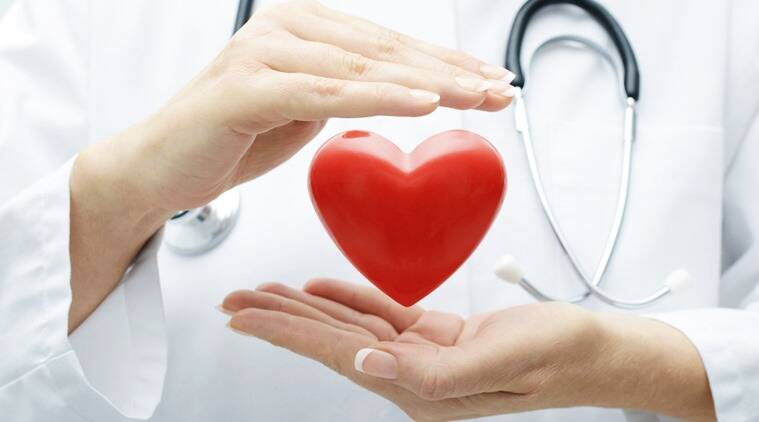

# `Source`:

## `Creators`:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

📑 
- According to WHO , Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. 
- More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.
- CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. 
- It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes. People with cardiovascular disease or who are at high cardiovascular risk (due to the existence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

🎯  **`How can we reduce the Heart diseases death rate?`**

- The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
- We Aim to deploy a machine learning model that can predict whether the person may have a heart disease or not.

 🩺 <span style="font-size:35px;background-color:#ccffdd; color :#009933">Our Problem</span>

- Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

🙋‍♀‍ <span style="font-size:35px;background-color:#ccffdd; color :#009933">Import Libraries</span>

In [3]:
import numpy as np              # NumPy is a Python library used for working with arrays.
import pandas as pd             # Pandas is mainly used for data analysis. Pandas allows importing data from various file formats such as comma-separated values, JSON, SQL, and Microsoft Excel.     
import seaborn as sns           # Seaborn is a library in Python predominantly used for making statistical graphics. Seaborn is a data visualization library built on top of matplotlib .
import matplotlib.pyplot as plt # Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.
import sklearn

In [4]:
# Loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('heart.csv')

🔍
<span style="font-size:35px;background-color:#ccffdd; color :#009933">EDA : </span>

# Let's Explore our data !!!

<span style="font-size:20px;background-color:#ccffdd; color :#009933">- Analyze by describing the data </span>

In [5]:
# First 5 rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Columns of data
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

💾 
<span style="font-size:20px;background-color:#ccffdd; color :#009933">Features: </span>


There are 2 types of input features:

- Objective: factual information;
- Examination: results of medical examination;





**`sex : 1 = Male , 0=Female`**

**`cp : Chest Pain`**
- Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina.
    Value 0: typical angina || Value 1: atypical angina || Value 2: non-anginal pain || 3: asymptomatic
    

**`threstbps :Resting blood pressure`**
- ( Normal pressure with no exercise )
 
 
**`chol: serum cholestoral in mg/dl`**
- Cholesterol means the blockage for blood supply in the blood vessels


**`fbs: fasting blood sugar > 120 mg/dl`**
- (1 = true; 0 = false) blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
    
    
**`restecg: resting electrocardiographic results (values 0,1,2)`**
- ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening
         
**`thalach: maximum heart rate achieved`**
          
**`exang: exercise induced angina`**
- (1 = yes; 0 = no) is chest pain while exercising or doing any physical activity.

**`oldpeak = ST depression induced by exercise relative to rest`**
- ST Depression is the difference between value of ECG at rest and after exercise.
- An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches, 
     
**`slope:	the slope of the peak exercise ST segment`**
- Value 0: upsloping — Value 1: flat — Value 2: downsloping
 
**`ca:	number of major vessels (0-3) colored by flourosopy`**
- Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope (/ˈflʊərəskoʊp/) allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched

**`thal:The Types of thalassemia`**
- (1,3 = normal; 6 = fixed defect; 7 = reversable defect)

In [7]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Number of rows and columns
df.shape

(303, 14)

In [9]:
# Show values of every row in our dataset in a form of numpy array
df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [10]:
# Show distinctive values of categorical coulmns
sex = df.sex.values
restecg = df.restecg.values
exang = df.exang.values
slope = df.slope.values
thal = df.thal.values
print("Sex values are : ",set(sex))
print("Restecg values are : ",set(restecg))
print("Exang values are : ",set(exang))
print("Slope values are : ",set(slope))
print("Thal values are : ",set(thal))

Sex values are :  {0, 1}
Restecg values are :  {0, 1, 2}
Exang values are :  {0, 1}
Slope values are :  {0, 1, 2}
Thal values are :  {0, 1, 2, 3}


In [11]:
# Show number of distinctive values for each coulmns
df.apply(lambda x:len(x.unique()))

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<span style="font-size:25px;background-color:#ccffdd; color :#009933">- Dealing with Missing Values : </span>

In [12]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- No missing data, cool!    :)

- Does it indicate that the data is really stable? check the outliers or Wrong Data. . .
- First we will need some statistical information...

<span style="font-size:25px;background-color:#ccffdd; color :#009933">- Statistical measuers (mean , standard deviation , min , max) : </span>

In [13]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


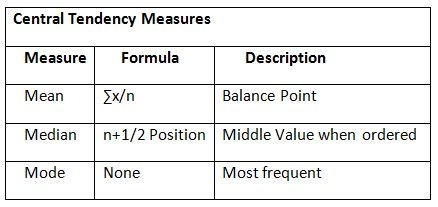

📌
# `Conclusion :`
- Using statistical methods such as (Min, Max, Mean, Std) in Quantitive data.
- With research:
  - A person may have very high chol (cholesterol), like >500 mg/dl ,but can't have 0 cholestrol.
  - A threstbps (rest blood pressure) of >180 mm of Hg but not 0.
- Using these statical mrthods, I find that there are no wrong values in Quantitive data such as negative values. 😉  

---

<span style="font-size:25px;background-color:#ccffdd; color :#009933"> - Detecting outliers 😈 : </span>

- A box and whisker plot (also called boxplot) shows the five numbers summary of a set of data : minimum , lower quartile , meduium, upper quartile and maximum . 



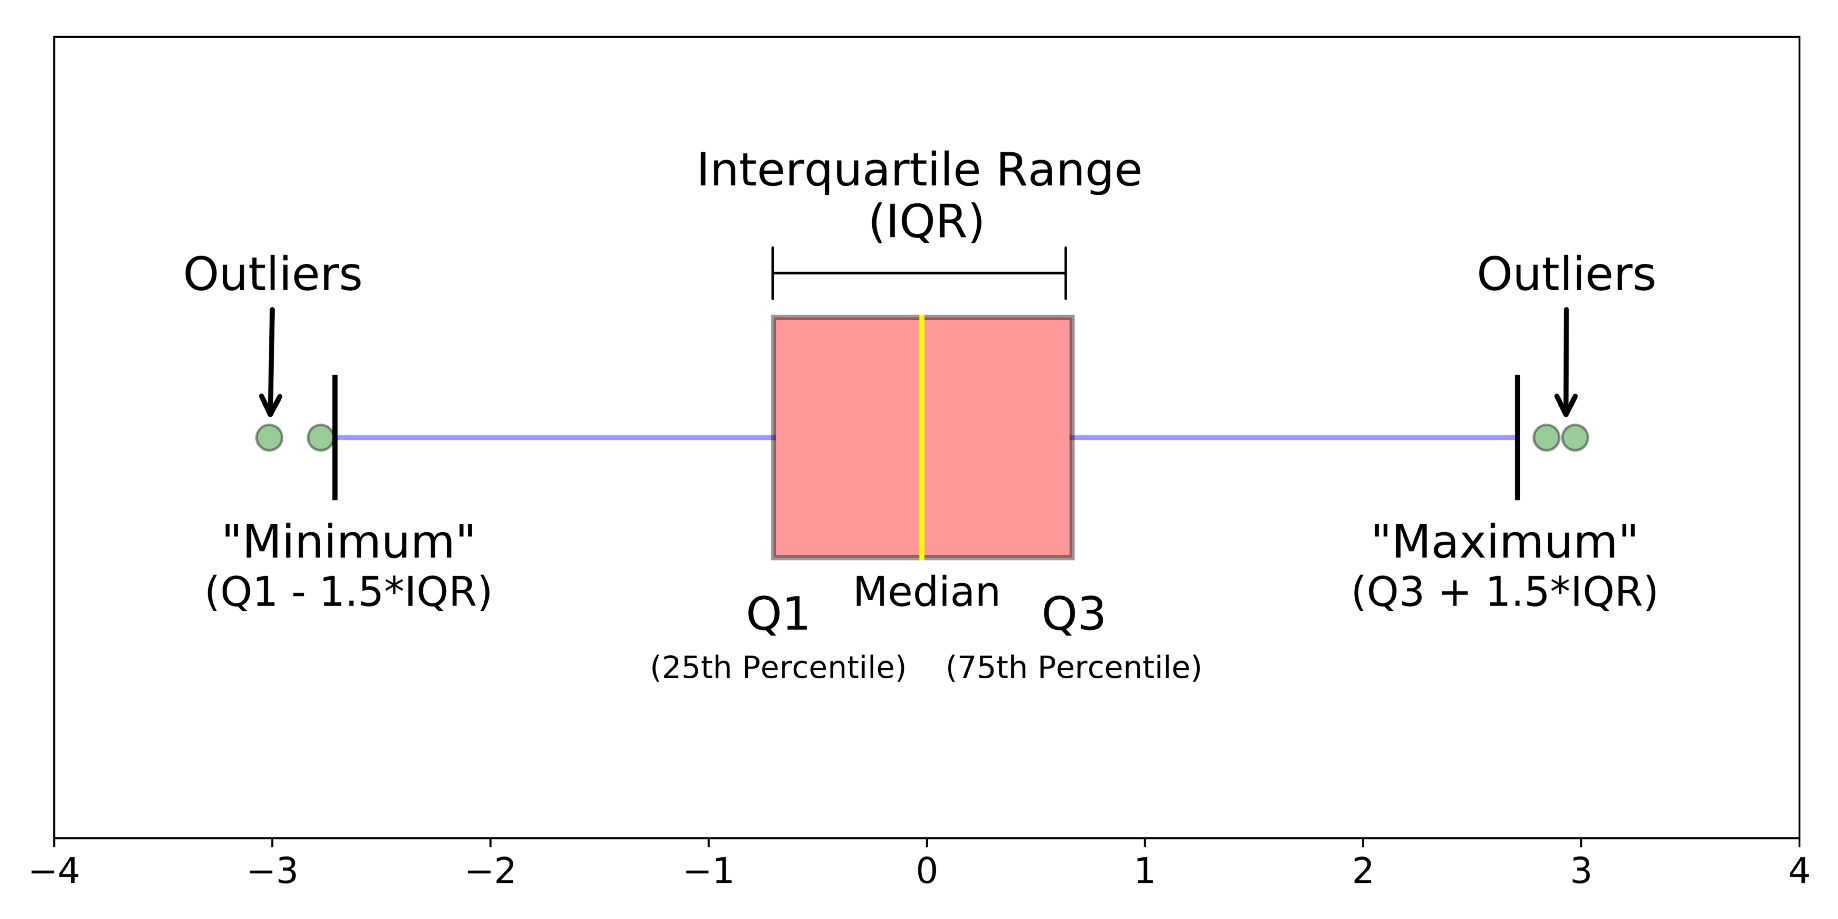

### `Age outliers :`

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

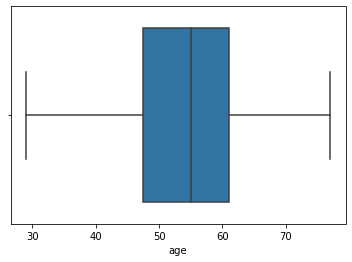

In [14]:
sns.boxplot(df['age'])

### `Trestbps outliers :`

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

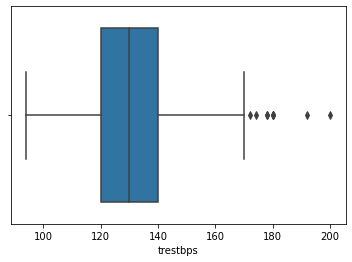

In [15]:
sns.boxplot(df['trestbps'])

In [16]:
# Trestbps
Q1 = df.trestbps.quantile(0.25)
Q3 = df.trestbps.quantile(0.75)
Q1, Q3

(120.0, 140.0)

In [17]:
IQR = Q3 - Q1
IQR

20.0

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(90.0, 170.0)

In [19]:
df[df['trestbps'] > upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [20]:
df = df[df['trestbps'] <= upper_limit]

In [21]:
df.shape

(294, 14)

### `Chol outliers :`

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

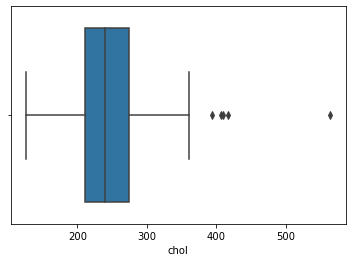

In [22]:
sns.boxplot(df['chol'])

In [23]:
# Chol
Q1 = df.chol.quantile(0.25)
Q3 = df.chol.quantile(0.75)
Q1, Q3

(211.0, 273.75)

In [24]:
IQR = Q3 - Q1
IQR

62.75

In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(116.875, 367.875)

In [26]:
df[df['chol'] > upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [27]:
df = df[df['chol'] < upper_limit]

In [28]:
df.shape

(289, 14)

### `Thalach outliers :`

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

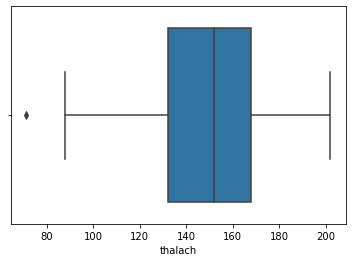

In [29]:
sns.boxplot(df['thalach'])

In [30]:
# Thalach
Q1 = df.thalach.quantile(0.25)
Q3 = df.thalach.quantile(0.75)
Q1, Q3

(132.0, 168.0)

In [31]:
IQR = Q3 - Q1
IQR

36.0

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(78.0, 222.0)

In [33]:
df[df['thalach'] < lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [34]:
df = df[df['thalach'] > lower_limit]

In [35]:
df.shape

(288, 14)

### `Oldpeak outliers :`

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

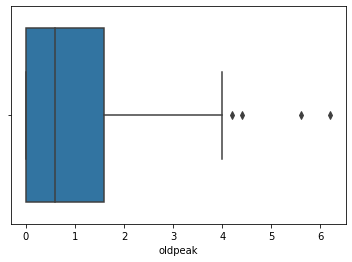

In [36]:
sns.boxplot(df['oldpeak'])

In [37]:
# Oldpeak
Q1 = df.oldpeak.quantile(0.25)
Q3 = df.oldpeak.quantile(0.75)
Q1, Q3

(0.0, 1.6)

In [38]:
IQR = Q3 - Q1
IQR

1.6

In [39]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-2.4000000000000004, 4.0)

In [40]:
df[df['oldpeak'] > upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [41]:
df = df[df['oldpeak'] < upper_limit]

---

📌
# `Conclusion :`
- ``There are outliers in each features except age. We removes all outliers now with the help of BoxPlot.`` 😉

---

<span style="font-size:35px;background-color:#ccffdd; color :#009933">Visulization </span>

<span style="font-size:25px;background-color:#ccffdd; color :#009933"> Distribution of data : </span>

<span style="font-size:20px;background-color:#ccffdd; color :#009933"> 1- Dealing with discreate features using Probability Mass Function : </span>

- **A discrete variable is a variable that can only take on a "countable" number of values. If you can count a set of items, then it’s a discrete variable.**
- **In statistics we represent a distribution of discrete variables with PMF's (Probability Mass Functions) and CDF's (Cumulative Distribution Functions).**
- **A probability mass function (pmf) is a function over the sample space of a discrete random variable X which gives the probability that X is equal to a certain value.**
- We have some discrete fetures such as sex, cp , fps , target.

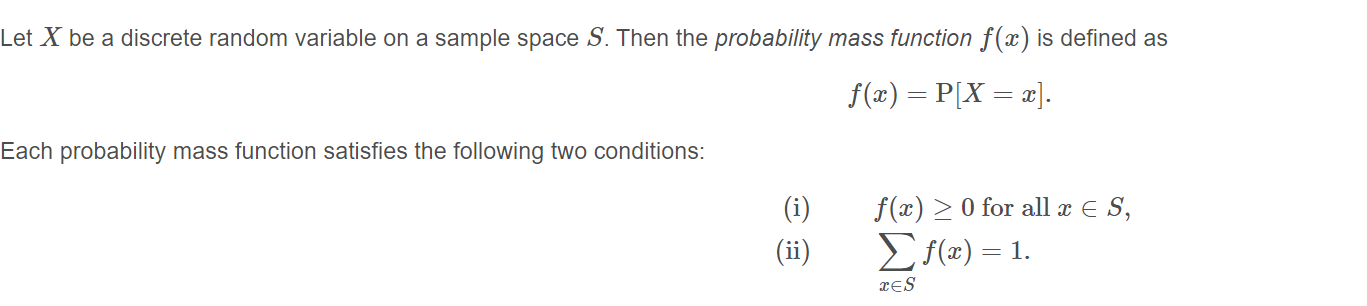

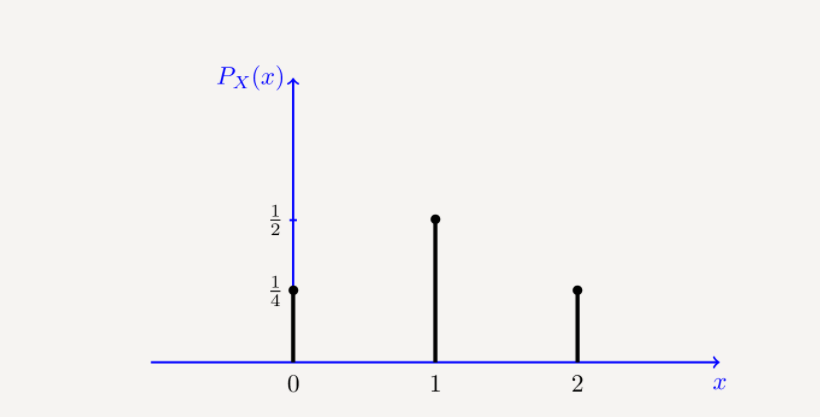

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='Prop'>

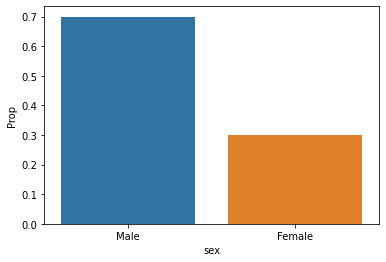

In [42]:
x = df['sex']
x = pd.DataFrame(x.value_counts())     # Make a new Data Frame for ( gender , value counts ) for each gender
length = len(df['sex'])                # Total numbers of people (sex gender)
data = pd.DataFrame(x)
data.columns = ["Counts"]              # Rename the coulmn from Sex to Counts
data["Prop"] = data["Counts"]/ length  # Make a new column for probability for each gender
sex = ["Male","Female"]
data['sex'] = sex
sns.barplot(data["sex"],data["Prop"])

In [43]:
df.sex.value_counts() / len(df)
# 0 => Female
# 1 => Male

1    0.699647
0    0.300353
Name: sex, dtype: float64

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='Prop'>

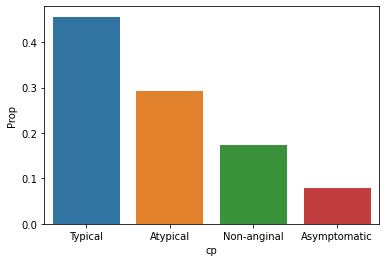

In [44]:
x = df['cp']
x = pd.DataFrame(x.value_counts()) #Make a new Data Frame for ( gender , value counts ) for each gender
length = len(df['cp'])                 # Total numbers of people (sex gender)
data = pd.DataFrame(x)
data.columns = ["Counts"]              # Rename the coulmn from Sex to Counts
data["Prop"] = data["Counts"]/ length  # Make a new column for probability for each gender
cp = ["Typical","Atypical","Non-anginal","Asymptomatic"]
data['cp'] = cp
sns.barplot(data["cp"],data["Prop"])

In [45]:
df.cp.value_counts() / len(df)
# 0 => typical angina
# 1 => atypical angina
# 2 => non-anginal pain
# 3 => asymptomatic

0    0.455830
2    0.293286
1    0.173145
3    0.077739
Name: cp, dtype: float64

---

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='Prop'>

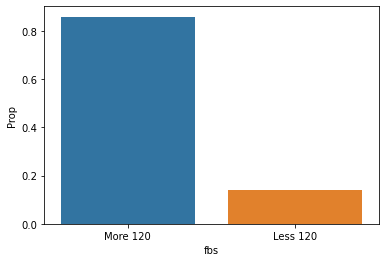

In [46]:
x = df['fbs']
x = pd.DataFrame(x.value_counts())
length = len(df['fbs'])
data = pd.DataFrame(x)
data.columns = ["Counts"]
data["Prop"] = data["Counts"]/ length
fbs = ["More 120","Less 120"]
data['fbs'] = fbs
sns.barplot(data["fbs"],data["Prop"])

In [47]:
df.fbs.value_counts() / len(df)
# 0 => More 120
# 1 => Less 120

0    0.858657
1    0.141343
Name: fbs, dtype: float64

---

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='Prop'>

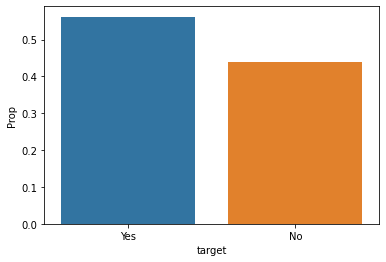

In [48]:
x = df['target']
x = pd.DataFrame(x.value_counts())      #Make a new Data Frame for ( gender , value counts ) for each gender
length = len(df['target'])                 # Total numbers of people (sex gender)
data = pd.DataFrame(x)
data.columns = ["Counts"]               # Rename the coulmn from Sex to Counts
data["Prop"] = data["Counts"]/ length   # Make a new column for probability for each gender
target = ["Yes","No"]
data['target'] = target
sns.barplot(data["target"],data["Prop"])

In [49]:
df.target.value_counts() / len(df)
# 0 => No
# 1 => Yes

1    0.561837
0    0.438163
Name: target, dtype: float64

- Ohhh ! Our Problem looks balanced !! As there is no major difference between the proportion of people having heart disease and those not having heart disease.

📌
# `Conclusion :`
- ``Gender``:

  - 69.9647% Males
  - 30.0353% Females
  
  
- ``CP``:

  - 45.5830% Typical Angima
  - 29.3286% Atypical Angima
  - 17.3145% Non-Anginal Pain
  - 7.7739%  Asymptomatic
  
  
- ``FBS``:

   - 85.8657%  More 120 (fbs)
   - 14.1343%  Less 120 (fbs) 
   
   
- ``Target``:

  - 56.1837% Have heart disease
  - 43.8163% Not Have heart disease

<span style="font-size:20px;background-color:#ccffdd; color :#009933"> 2- Dealing with Continious features using Probability Denisty Function : </span>

- **A continuous variable takes on an "uncountable" number of values. An example of a continuous variable is length. Length can be measured to an arbitrary degree and is therefore continuous.**
- **In statistics We represent distributions of continuous variables with PDF's (Probability Density Functions) and CDF's.**
- **Probability density function (PDF) is a statistical expression that defines a probability distribution (the likelihood of an outcome) for a discrete random variable (e.g., a stock or ETF) as opposed to a continuous random variable.**
- We have some continious features such as age, trestbps , chol , oldpeak.

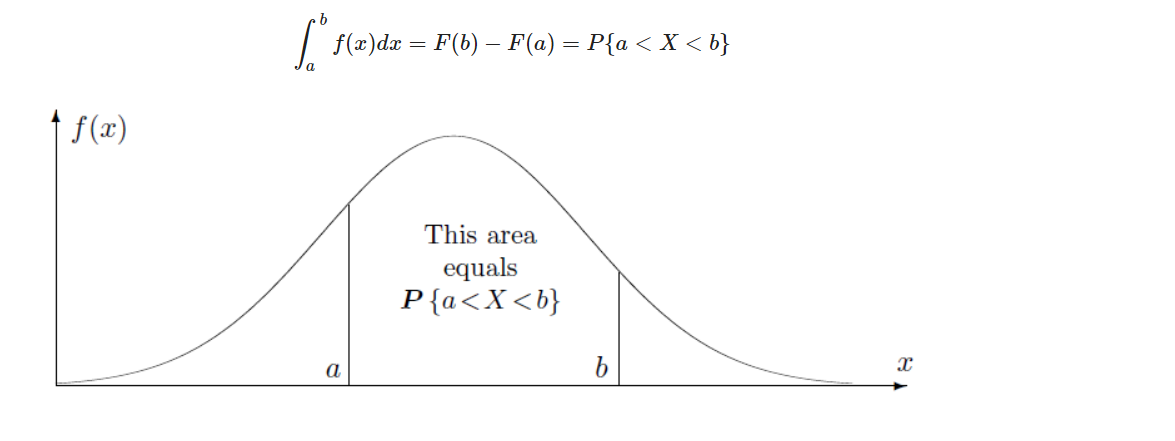

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

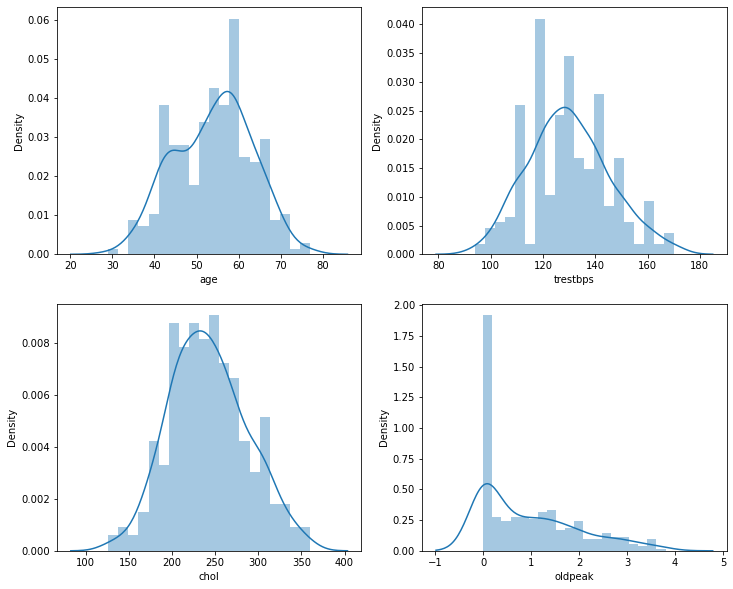

In [50]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
sns.distplot(df.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.trestbps, bins = 20, ax=ax[0,1]) 
sns.distplot(df.chol, bins = 20, ax=ax[1,0]) 
sns.distplot(df.oldpeak, bins = 20, ax=ax[1,1]) 

📌
# `Conclusion :`
- Age:
  - Patients in data set are from age 29 years to 77 years.
  - Around 50% of patients’ age was in between 45-65 years.
- Oldpeak feature is right skewed, so that means most patients have little oldpeak.
  
- The numeric features looks more or less normally distributed.😉

<span style="font-size:25px;background-color:#ccffdd; color :#009933"> Other Visulizations : </span>

🧮
## `Correlation Matrix` :

- In probability theory and statistics, a covariance matrix is a square matrix giving the covariance between each pair of elements of a given random vector.

(14.5, -0.5)

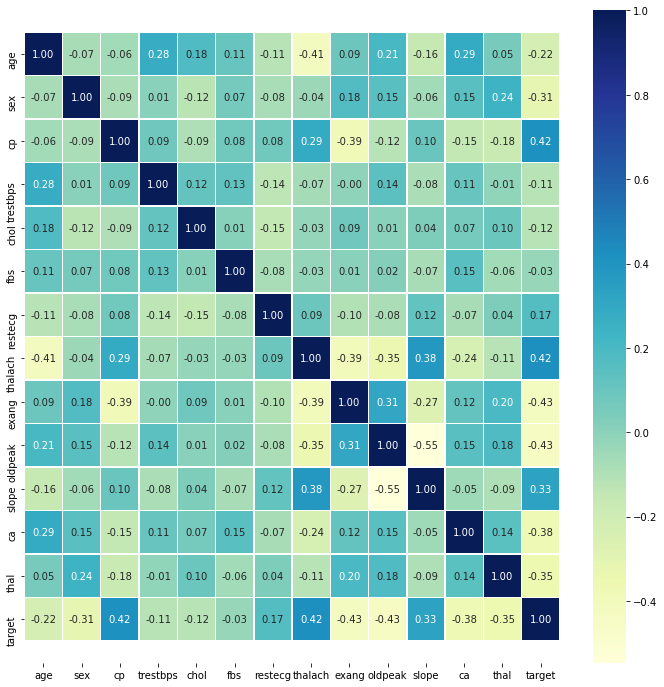

In [51]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

📌
# `Conclusion`:
- This heat map is to show the correlations between the different attributes of the given dataset. 
- In above result, we are getting the value between the +1 value to -1 value. So, positive value indicate positive relationship and the negative value indicate the negative relationship.
- It shows that almost all of the features/attributes given in the dataset are very less correlated with each other.
- Most other variables have an equal correlation with the target variable.
- fbs and chol are the lowest correlated with the target variable.
- This implies we must take into consideration all of the features.

💡
## `Gender` vs `Target` :  

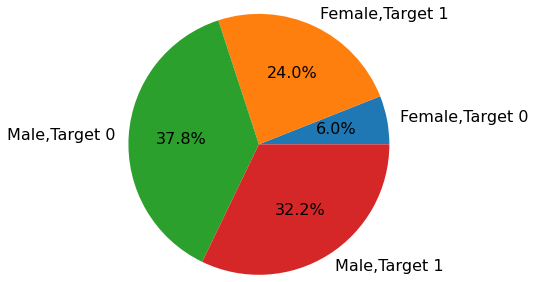

In [52]:
df_sex = df.groupby(["sex","target"]).size()
plt.pie(df_sex.values, labels = ["Female,Target 0", "Female,Target 1", "Male,Target 0", "Male,Target 1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

📌
# `Conclusion`:
- 🚨 The ratio of male has heart disease is 32.2%, a little bit higher than female (24%).
- 🚨 We might think that more number of men have heart disease but if we observe closely, we can see that more proportion of female have heart disease as compared to men as (69.9647% Males , 30.0353% Females), Males persentage is more that double women persentage.  
- 🚨 According to Harvard Health Publishing. Heart attacks strike men at younger ages than women. But survival rates are worse in women.
https://www.health.harvard.edu/heart-health/the-heart-attack-gender-gap
- 🚨 In our data, Gender is not very effective feature to indicate the person have heart disease or not. ❌

💡 
## `Age` vs `Target` :

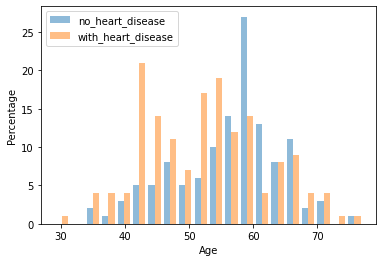

In [53]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with_heart_disease"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend()
plt.show()

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


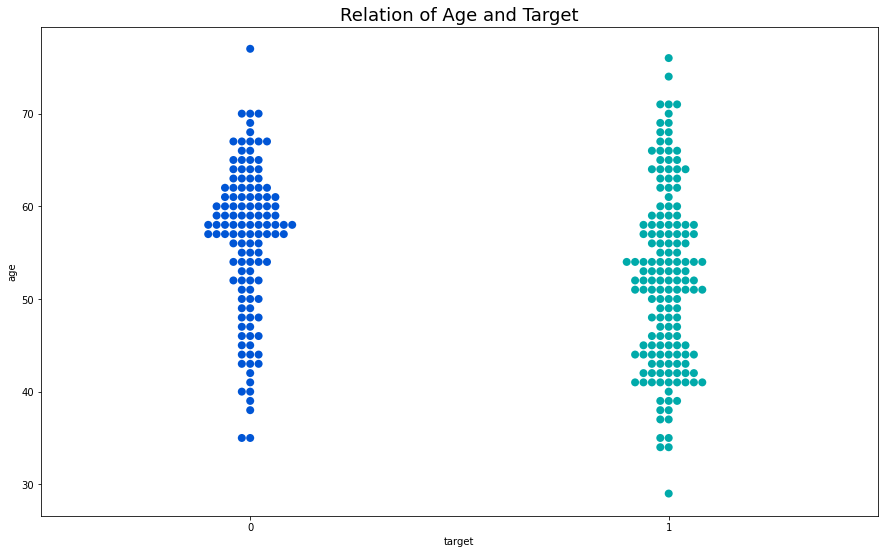

In [54]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(df['target'], df['age'], palette = 'winter', size = 8)
plt.title('Relation of Age and Target', fontsize = 18, fontweight = 31)
plt.show()

📌
# `Conclusion`:
- 🚨 The ratio get higher over the age of (40:60). Thay are under high risk of heart disease.
- 🚨 But when it come to 60 age and more , people who do not have heart disease is increasing.
- 🚨 From the second graph, people who have heart disease and people who do not have lie in the same range from (30 : more than 70).
- 🚨 So, Age is not effective feature to diagonse Heart Diseases. (We can not detect a clear pattern for this feature). ❌

💡
## `CP` vs `Target` :

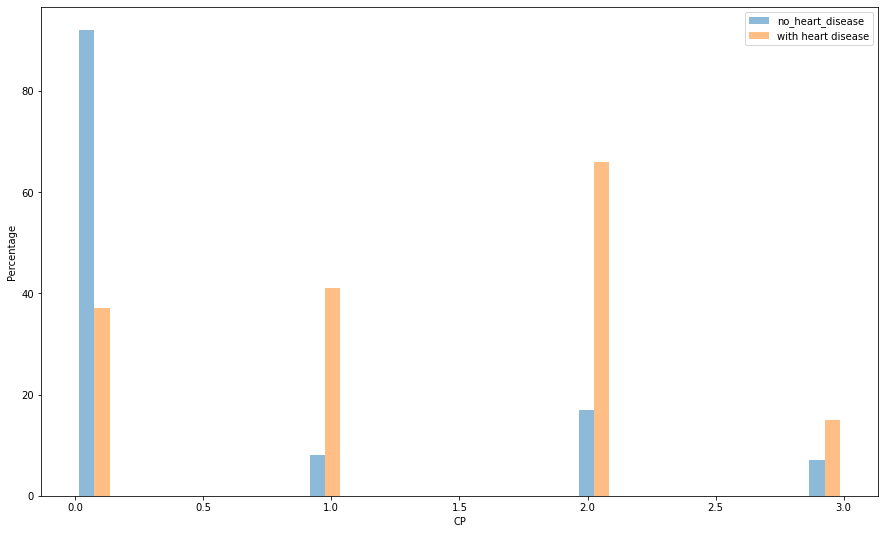

In [55]:
plt.hist([df[df.target==0].cp, df[df.target==1].cp], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("CP")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 From the above graph : CP {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
- 🚨 Patients suffering from Non-Aginal Chest Pain have more chances of getting Heart Diseases problems.
- 🚨 Most Patients suffering from typical angina chest pain doesnot face heart disease problem.
- 🚨 CP is effective feature in Heart disease prediction.

💡
## `Trestbps (Resting Blood Pressure)` vs `Target` : 

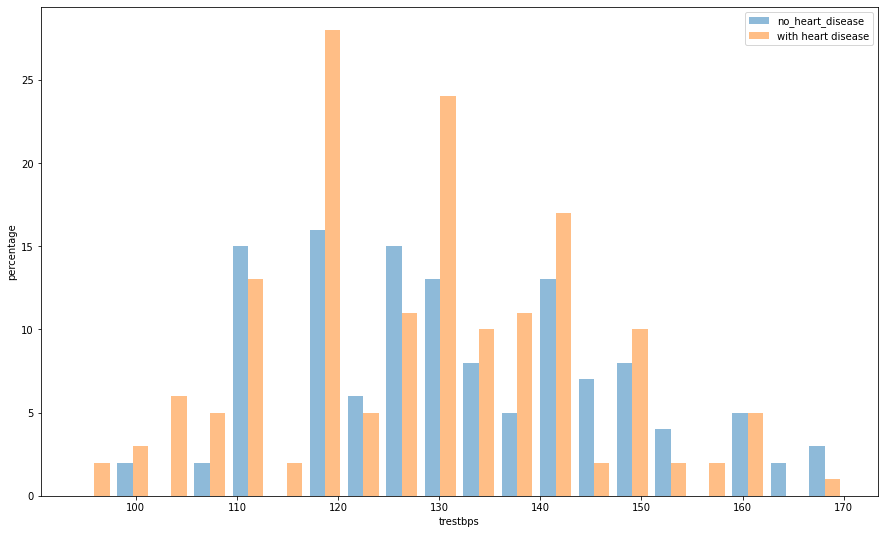

In [56]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 The ideal blood pressure should be lower than 120 mmHg. Whether the patients have heart disease or not , over 50% patients have higher blood pressure.
- 🚨 Those patients having Blood Pressure in the range of 120 to 140 have the highest chance of having heart disease
- 🚨 From this graph, the trestbps is quite good feature (We should take into consideration).

💡 
## `Chol (Serum Cholestoral)` vs `Target` :

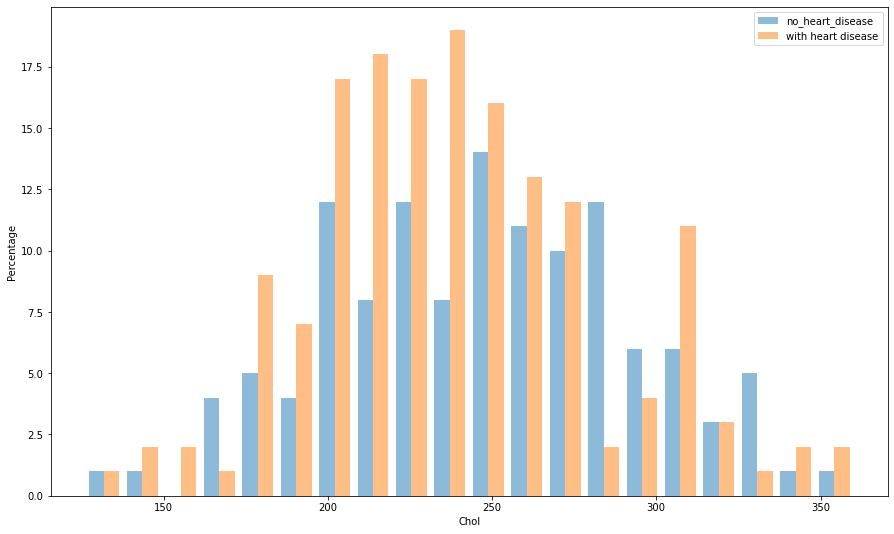

In [57]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Chol")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 According to the research, the normal value of chol should be lower than 200mg/dl.
- 🚨 Patients suffering from heart diseases have higher cholestrol levels (greater than 200) in comparison to patients not suffering from the heart diseases.
- 🚨 Cholestrol levels have a significent effect in Heart disease prediction.

💡 
## `Thal (The Heart Status as Retrieved from Thallium Test)` vs `Target` :

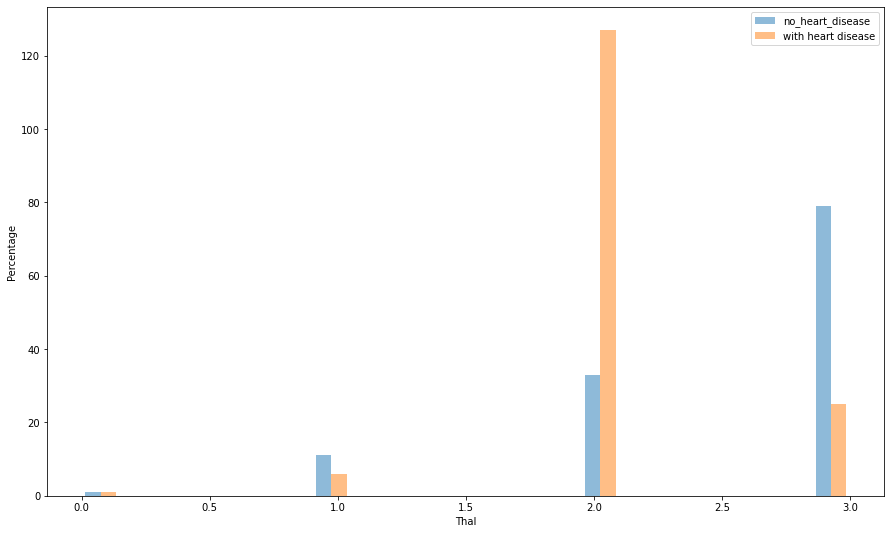

In [58]:
plt.hist([df[df.target==0].thal, df[df.target==1].thal], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Thal")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.
- 🚨 Thal is a good feature in Heart disease prediction.

💡
## `Slope (The Slope of the Peak Exercise ST Segment)` vs `Target` :

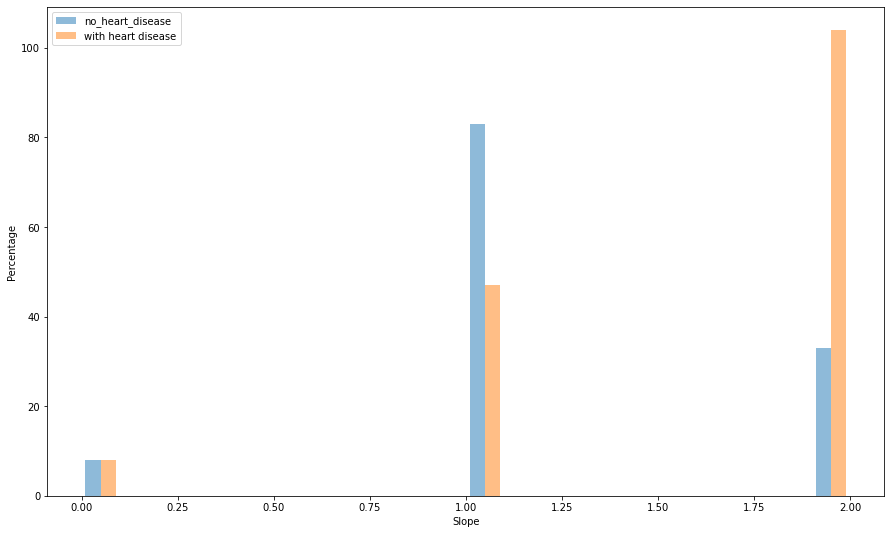

In [59]:
plt.hist([df[df.target==0].slope, df[df.target==1].slope], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Slope")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- 🚨 Up sloping and flat were two major types exercise ST segment for many patients. 
- 🚨 Most of patients not suffering from heart disease have had up sloping exercise.
- 🚨 Most of patients suffering from heart disease have had flat exercise ST segment.
- 🚨 Slope is a good feature in Heart disease prediction .

💡
## `Exang (Exercise Induced Angina)` vs `Target` :

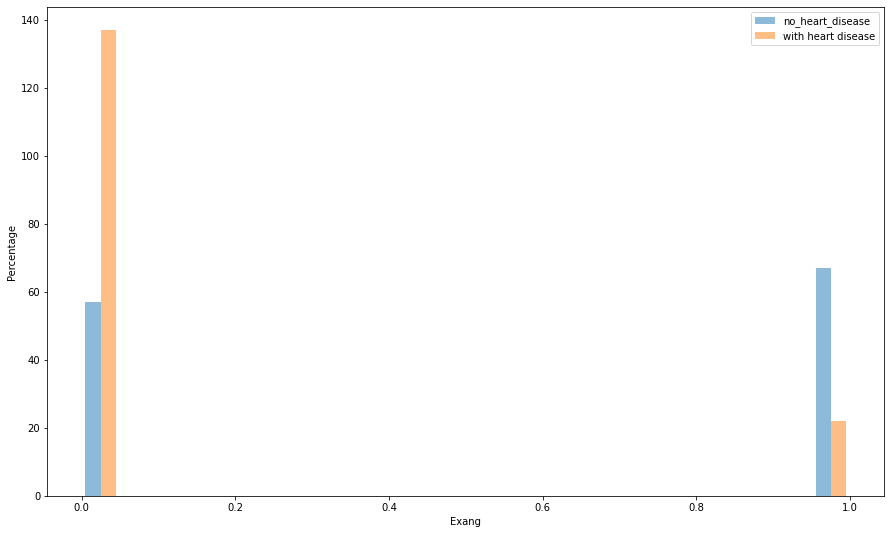

In [60]:
plt.hist([df[df.target==0].exang, df[df.target==1].exang], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Exang")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 Having exercise induced angina for patients suffering from heart diseases is more prominent than a patient not suffering from heart diseases.
- 🚨 This shows having a exercise induced angina may be a major(effective) feayute for having a heart disease.
- 🚨 Exang is a good feature in Heart disease prediction .

💡
## `CA` vs `Target` :

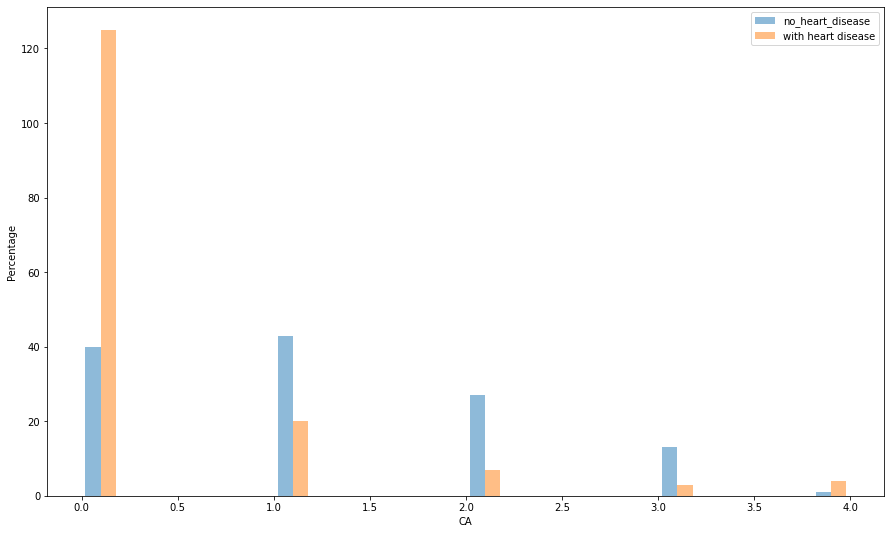

In [61]:
plt.hist([df[df.target==0].ca, df[df.target==1].ca], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("CA")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 According to the medicine knowledge, if the major vessels colored by flourosopy get more, it means that the risk of heart disease will be lower. So, vessel flourosopy examination for everyone is a very important process to diagnose whether the people has heart disease or not.
- 🚨 Graph shows that the patients suffering from Heart Diseases have high values of Major Vessels (CA).
- 🚨 Wheras the patiets not suffering from Heart Diseases have very low values of Major Vessels.
- 🚨 The more blood movement (Number of Major Vessels) the better.
- 🚨 So people with ca equal to 0 are more likely to have Heart Diseases.
- 🚨 CA Number have a significent effect in Heart Diseases prediction.

💡
## `Restecg (Resting Electrocardiographic Results)` vs `Target` :

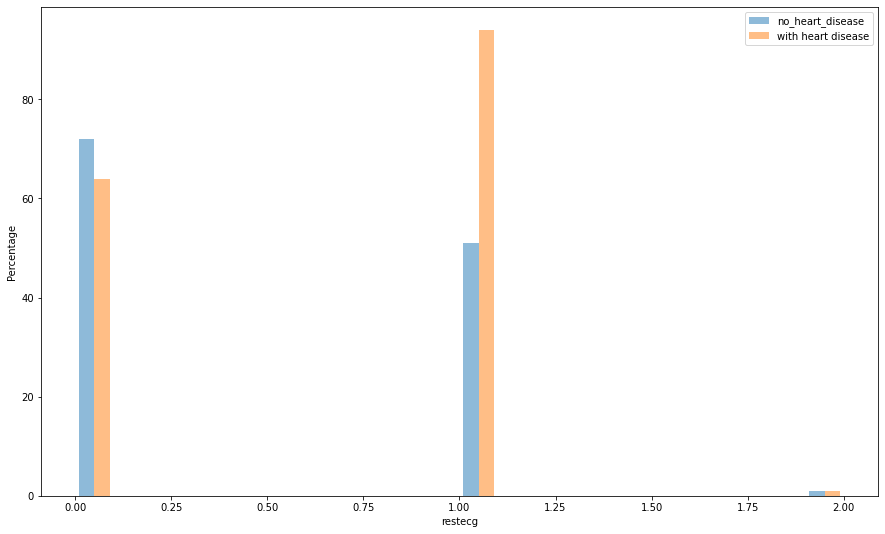

In [62]:
plt.hist([df[df.target==0].restecg, df[df.target==1].restecg], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("restecg")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 A large proportion of people having restecg of type 1 (having ST-T wave abnormality) actually have heart disease. We must take care of ST-T Wave abnormality as it can range from mild symptoms to severe problems.
- 🚨 Restecg has a significent effect in Heart Diseases prediction.

💡
## `Thalach (Maximum Heart Rate Achieved)` vs `Target` : 

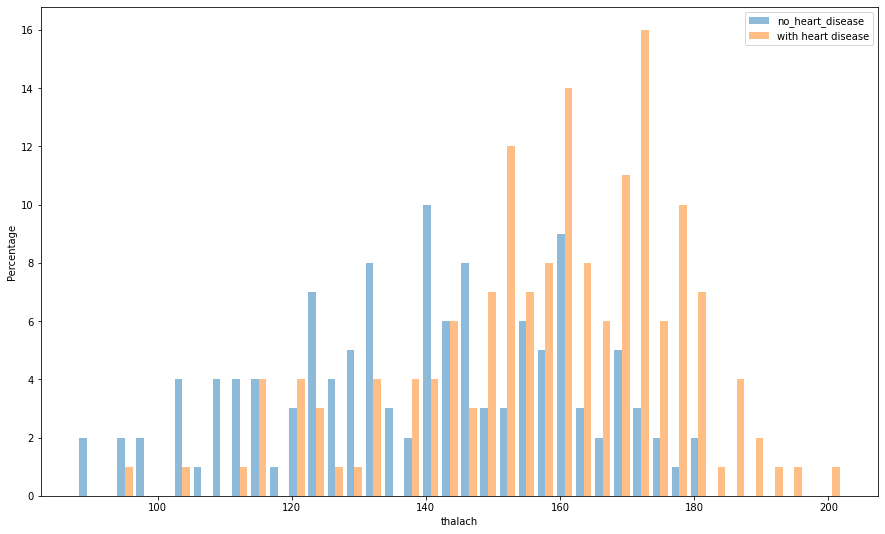

In [63]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 40, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("Percentage")
plt.legend()
plt.show()

📌
# `Conclusion`:
- 🚨 The patients having maximum heart rate greater than 150 are at a greater risk of having heart disease.
- 🚨 Thalach has a significent effect in Heart Diseases prediction.

---

<span style="font-size:35px;background-color:#ccffdd; color :#009933">Modelling </span>

## `Feature selection:` 

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

<AxesSubplot:>

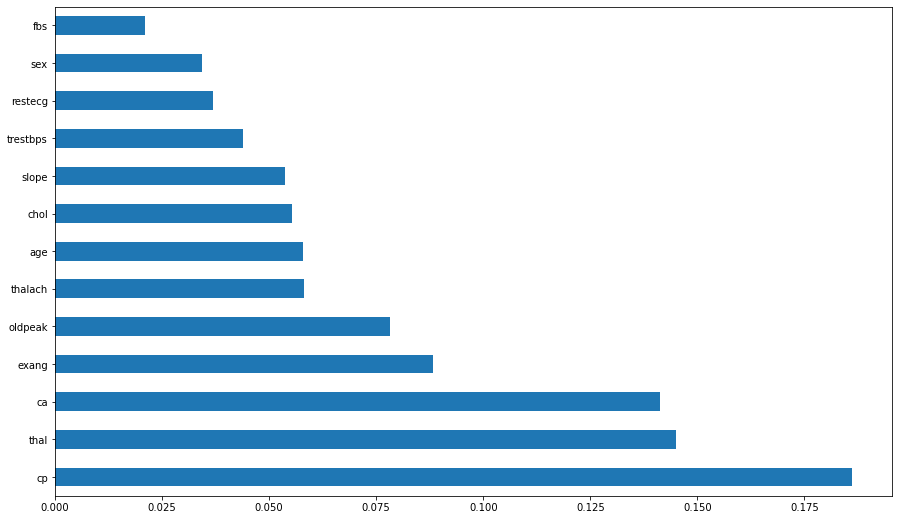

In [75]:
model = ExtraTreesRegressor()
feat_imp = model.fit(x, y)
feat_imp.feature_importances_
imp = pd.Series(feat_imp.feature_importances_, index = x.columns)
imp.nlargest(14).plot(kind = 'barh')

In [70]:
x = np.array(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']])
y = np.array(df['target'])

In [71]:
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.07179227 0.0615887  0.11766934 0.0599849  0.06150392 0.02098646
 0.03781273 0.09019524 0.0931603  0.0874504  0.06825999 0.12735586
 0.10223988]


----------

## `KNN:` 

In [305]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

KNeighborsClassifier()

In [306]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.4,random_state=5)

In [307]:
confusion_matrix(y_test,knn.predict(x_test))

array([[34, 19],
       [ 9, 52]], dtype=int64)

In [308]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [309]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.7514792899408284
0.7543859649122807


In [310]:
prediction_lr=knn.predict(x_test)
print('__________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('__________________________')

__________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71        53
           1       0.73      0.85      0.79        61

    accuracy                           0.75       114
   macro avg       0.76      0.75      0.75       114
weighted avg       0.76      0.75      0.75       114

__________________________


## `Logestic regression:`

In [311]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [312]:
classifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [313]:
print(classifier.score(x_train,y_train))
print(classifier.score(x_test,y_test))

0.8698224852071006
0.8508771929824561


In [314]:
prediction_lr=classifier.predict(x_test)
print('__________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('__________________________')

__________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82        53
           1       0.81      0.95      0.87        61

    accuracy                           0.85       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.86      0.85      0.85       114

__________________________


## `SVM :`

In [99]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [109]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [110]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [117]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[23 12]
 [ 2 34]]


In [113]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9339622641509434
0.8028169014084507


Logestic regression: 0.8508771929824561
SVM : 0.8028169014084507
KNN: 0.7543859649122807 